## Final Project Submission

Please fill out:
* Student name: JACQUILINE NALUKENGE TULINYE 
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: ASHA DEEN
* Blog post URL:


## Overview

This analysis focuses on how a company might start getting into making movies with a focus on major factors like budgets, ratings,income generated from foreign and domestic markets, type of movies(genres) and which studios to produce the movies among others.  This analysis should show the company where they should focus on in order to maximize profits with their given budget.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The aim of this analysis is to explore what factors contibuted to the outcomes of the various movies in the years given the above data. The analysis will translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what movies to venture into to maximize profits.
***




In [1]:
# importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
tmdb_movies =pd.read_csv('zippedData/tmdb.movies.csv')
movie_gross = pd.read_csv('zippedData/bom_movie_gross.csv')
imdb_ratings = pd.read_csv('zippedData/title.ratings.csv')
title_basics = pd.read_csv('zippedData/title.basics.csv')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

**Based on the available information from each dataset, The ones I will use for analysis are:**
- `tmdb_movies`
- `movie_gross`
- `imdb_ratings`
- `title_basics`
- `movie_budgets`
***


In [3]:
#viewing first 5 in tmdb_movies
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
#viewing first 5 in movie_gross
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#viewing first 5 in imdb_ratings
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
#viewing first 5 in title_basics
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
movie_budgets. head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# VIEWING THE DATA SETS INFORMATION 

In [9]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [10]:
tmdb_movies.shape

(26517, 10)

In [11]:
movies = tmdb_movies.copy()
movies['vote_count'].describe()   

count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

In [12]:
# Analysis of the tmd_movie
#id:This is the unique identifier for the movie 
#It has a column popularity which measures popularity of the movie 
# It shows when the movie was released with the title
# It has vote_average which is the rating of the movies in the tmd_movie
# the frame has 26517 rows and 10 columns  
# The unamed and vote_count have int as data types
# Popularity and vote_average have float as data types
# The rest of the columns have objects as the data types 
# The columns have no missing value according to tmd_movie.info()
# The mean average of the 194.22 votes
# The standard deviation 960.96 meaning the votes were spread out widely gauging from the mean
# The minimum vote is 1 and maximum is 22186


In [13]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
movie_gross.shape

(3387, 5)

In [15]:
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [16]:
# The movie_gross data frame  consists of the columns title: tiltle of the movie, studio: where it was produced, domestic and foreign: incomes generated from the movie demestically and from foreign and the year they were produced
# The frame has 3387 rows and 5 columns 
# domestic_gross is a float, year is a int and the rest are objects 
# studio has 5 missing values 
# domestic_gross has 28 missing values 
#foreign_gross has 1350 missing values
# The mean is 2.87
# The standard deviation is 6.70 meaning the data is spread widely 
# The minimum average gross is 1 and maximum average gross is 9.37

In [17]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
imdb_ratings.shape

(73856, 3)

In [19]:
imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [20]:
# imdb_ratings frame has averge rating of the movies and the number of votes 
# The frame has 7856 rows and 3 columns 
# imdb_rating has no missing values 
# The average is 6.33 
# The std is 1.47 meaning the data is clustered around the mean 
# The minimum rating is 1 and the maximum rating 10

In [21]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
title_basics.shape

(146144, 6)

In [23]:
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [24]:
# The title_basics frame has primary_title which is the title before production, original_title which is title as the movie is being released, has the runtime of the movie and the genres of the movies produced 
# The frame has 146144 rows and 6 columns 
# The average runtime_minutes is 86.19 minutes
# The standard deviation is 166.36 meaning the minutes are different gauging from the mean minutes 
# The minimum time is 1 and maximum time 51420
# original_title has 21 missing value
# The runtime_minutes has 31739 mising values 
# genres has 5408 missing values 

In [25]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
movie_budgets.shape

(5782, 6)

In [27]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [28]:
# The movie_budgets data set has no missing values 
#domestic_gross and world_gross to changed to float as they are objects

# DATA CLEANING 


In [29]:
movie_gross[movie_gross.duplicated(keep=False, subset='title')].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [30]:
imdb_ratings[imdb_ratings.duplicated(keep=False, subset=['tconst'])].sort_values(by='tconst')

,tconst,averagerating,numvotes


In [31]:
title_basics[title_basics.duplicated(keep=False, subset=['original_title','start_year', 'genres'])].sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
...,...,...,...,...,...,...
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [32]:

movies[movies.duplicated(keep=False, subset=['id'])].sort_values(by='id')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
20626,20626,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
14173,14173,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424
43,43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
24000,24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
20639,20639,"[28, 53, 878]",280,en,Terminator 2: Judgment Day,24.604,1991-07-03,Terminator 2: Judgment Day,7.9,6682
...,...,...,...,...,...,...,...,...,...,...
17071,17071,[27],560717,en,Requiem,0.600,2015-01-01,Requiem,5.0,1
23685,23685,[35],564441,en,Adopting Trouble,0.600,2016-04-08,Adopting Trouble,4.0,2
20461,20461,[35],564441,en,Adopting Trouble,0.600,2016-04-08,Adopting Trouble,4.0,2
23785,23785,[99],572012,en,Harvested Alive - 10 Years of Investigations,0.600,2016-11-28,Harvested Alive,1.0,1


Removing missing values in the data frame 

In [33]:
title_df = title_basics.copy()

title_df = title_df.assign(missing=title_df.isnull().sum(axis=1)).sort_values(by=['original_title', 'missing'], ascending=True)
title_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,0
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",0
131857,tt8219776,#5,#5,2018,NaN,Documentary,1
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy,0
90852,tt5255986,#66,#66,2015,116.0,Action,0
...,...,...,...,...,...,...,...
111377,tt6509234,Samurai Cop 3,NaN,2019,NaN,NaN,3
111899,tt6543294,The Work,NaN,2017,NaN,NaN,3
112608,tt6603544,Utopians,NaN,2015,NaN,NaN,3
115934,tt6877572,X A 7,NaN,2020,NaN,NaN,3


Changing the data types from objects 

In [34]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(",","").apply(float)
movie_gross['foreign_gross'].dtype

dtype('float64')

In [35]:
df_budgets = movie_budgets .copy()
df_budgets['production_budget'] = df_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747"


In [36]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Filling missing values in movie_gross

In [37]:
movie_gross['domestic_gross'] = movie_gross.domestic_gross.fillna(0.0)  
movie_gross['foreign_gross'] = movie_gross.foreign_gross.fillna(0.0) 

In [38]:
movie_gross['studio'] = movie_gross.studio.fillna('Unknown')

In [39]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


filling missing values in title 

In [40]:
imdb_title_df = title_basics.copy()
imdb_title_df['original_title'] = imdb_title_df['original_title'].fillna(title_df['primary_title'])
imdb_title_df['runtime_minutes'] = imdb_title_df['runtime_minutes'].fillna(imdb_title_df['runtime_minutes'].median())
title_df = title_df.dropna(subset=['genres'])



# Merging data frames 

In [41]:
joined_imdb_df = imdb_title_df.merge(imdb_ratings, on='tconst', how='inner')
joined_imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [42]:
#Changing the primary title in title_basics to title same as in movie_gross
joined_imdb_df.rename(columns = {'primary_title': 'title'}, inplace = True)
movies_df = joined_imdb_df.merge(movie_gross, on='title', how='inner')
movies_df.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013


Getting total income from movie_gross per movie 

In [43]:
movies_df = movie_gross.copy()
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']
movies_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [44]:
df_budgets['profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']
df_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08


# DATA VISUALIZATION 

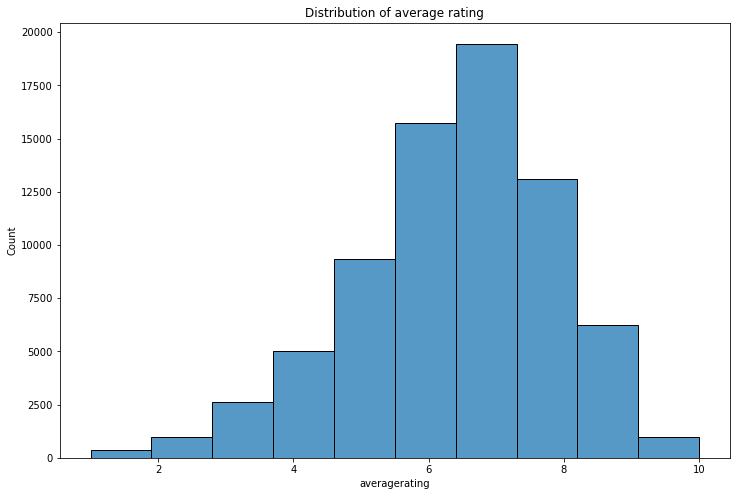

In [45]:
#Histogram showing average rating 
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(imdb_ratings['averagerating'], bins= 10, ax=ax)
ax.set_title('Distribution of average rating');

This shows the average rating of movies is centred around 7 meaning if the movie rating was above 7 it is good to produce but below 5 the movie is not the best to produce since few people watch 

In [46]:
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])

In [47]:
df_budgets['release_month'] = df_budgets['release_date'].apply(lambda x: x.month)


In [48]:
releasegroup = df_budgets.groupby('release_month').mean().reset_index() #group by release month


In [49]:
import calendar
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
releasegroup['release_month'] = releasegroup['release_month'].apply(lambda x: calendar.month_abbr[x])
releasegroup


,release_month,id,production_budget,domestic_gross,worldwide_gross,profit
0,Jan,50.060519,2.084349e+07,2.394962e+07,4.656382e+07,2.572033e+07
1,Feb,50.650510,2.804642e+07,3.541465e+07,7.154453e+07,4.349811e+07
2,Mar,49.917021,3.078208e+07,3.857299e+07,8.063337e+07,4.985129e+07
3,Apr,51.121145,2.380283e+07,2.732840e+07,5.992026e+07,3.611743e+07
4,May,50.555283,4.713520e+07,6.669795e+07,1.622680e+08,1.151328e+08
5,Jun,50.102296,4.309912e+07,6.582791e+07,1.425230e+08,9.942391e+07
6,Jul,50.104545,4.254616e+07,6.072804e+07,1.409636e+08,9.841746e+07
7,Aug,52.475806,2.555609e+07,3.216821e+07,6.097841e+07,3.542232e+07
8,Sep,48.488844,2.181290e+07,2.314989e+07,4.669369e+07,2.488078e+07
9,Oct,49.991274,2.039266e+07,2.442350e+07,4.946456e+07,2.907190e+07


Text(0.5, 1.0, ' Release Months')

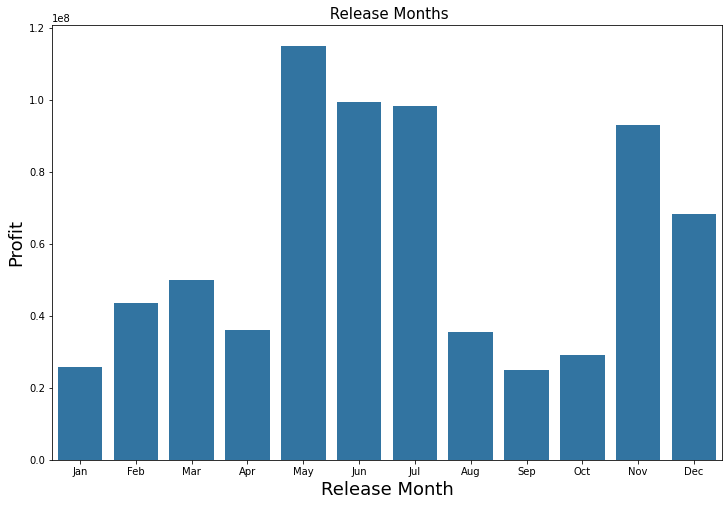

In [50]:
# Bar graph showing profitable months to release movies
fig,ax= plt.subplots(figsize=(12,8)) 
sns.barplot(x='release_month', y='profit', data=releasegroup, ax=ax, color='tab:blue')
plt.xlabel('Release Month', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.title(' Release Months', fontsize=15)

Bar graph shows a lot of profits were in in May-July and in Nov-Dec making this good months to release movies by the company 

In [51]:

#split the genre categories into a list, around the comma separator
imdb_title_df['genres'] = imdb_title_df['genres'].str.split(',')
#transform each element in the genres list to a row
imdb_title_df = imdb_title_df.explode('genres')
imdb_title_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


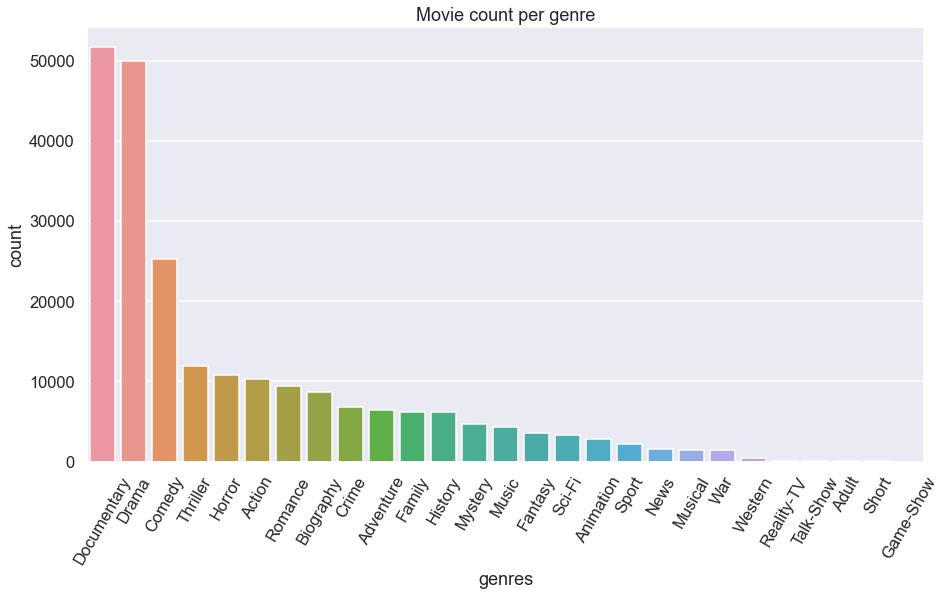

In [52]:
#Bar graph showing movie genre per count 
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.countplot(x=imdb_title_df['genres'], order=imdb_title_df['genres'].value_counts().index)
ax.set_title('Movie count per genre')
ax.set_xlabel('genres')
plt.xticks(rotation=60);

This shows which genre is popular to produce. It shows that documentary is the most popular genre to the least which is game_show meaning if investment is to happen it should start from Documentary, drama....

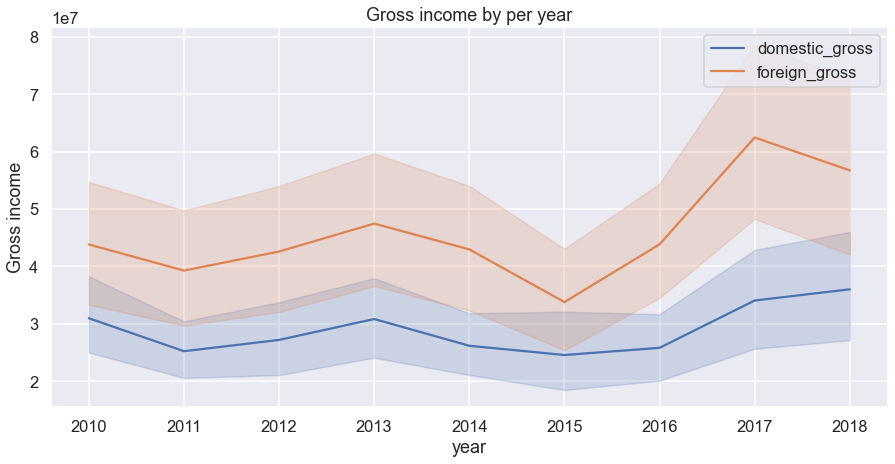

In [53]:
#lineplot showing the domestic gross and foreign gross in 2010-2018
fig, ax =plt.subplots(figsize=(15,7))
sns.lineplot(data=movie_gross, x='year', y='domestic_gross', ax=ax, label='domestic_gross')
sns.lineplot(data=movie_gross, x='year', y='foreign_gross', label='foreign_gross', ax=ax)
ax.set_title('Gross income by per year')
ax.set_ylabel('Gross income');

Originally from 2010-2013 the gross income was the same for the sell both within and outside markets. Major fluctions were seen between 2014-2018 that indicated bigger profits were seen from foreign_gross as compared to domestic_gross especially in 2017. Meanng it will production of the movie should target foreign markets to collect profits 

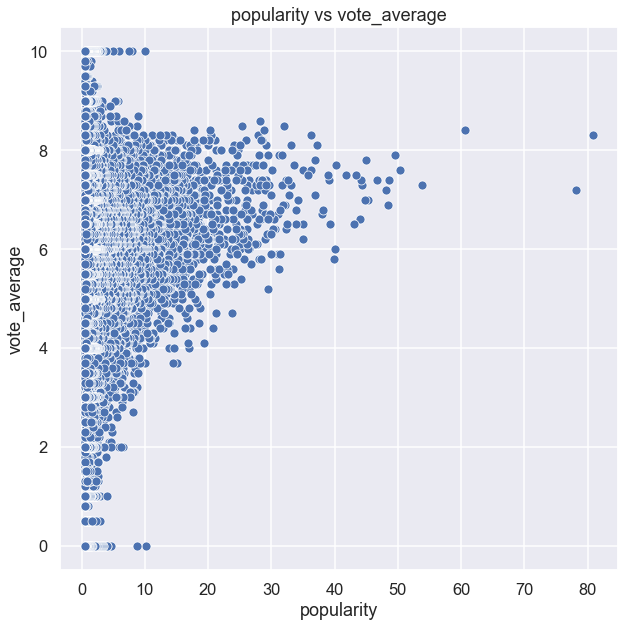

In [54]:
#scatter plot showing  popularity of the movie vs vote_count(rating)
fig, ax =plt.subplots(figsize=(10,10))
sns.scatterplot(x=tmdb_movies['popularity'], y=tmdb_movies['vote_average'], ax=ax)
ax.set_title('popularity vs vote_average')
ax.set_ylabel('vote_average')
ax.set_xlabel('popularity');

Movies that are popular in the market get higher vote_average. Hence focus to be put on movies that are popular and get feedback on why they are popular before venturing into production 

# RECOMMENDATIONS 
1.Microsoft should use BV as a point of reference as they get maximum profits as per the above data

2.The foreign gross income is doing better than domestic gross hence would recommended Microsoft to focus on movies that are palatable to bith markerts to maximize profits to be gained 

3.Microsoft should diversify in the production of various movies as they have various profits.



# CONCLUSION 
In summary I would recommend Microsoft to venture into movie production gauging from the profits earned from various studios and the audience Microsoft has at hand.However, they should focus on doing market research looking at audience preference for good ratings, produce for worldwide markets and set aside a good budget plan if hey are to succeed. 